# 📊 Exploratory Data Analysis: Google Play Store

## 1. Description

1. **App:** Name of the App
2. **Category:** Category under which the App falls
3. **Rating:** Application's rating on the Play Store
4. **Reviews:** Number of reviews of the App
5. **Size:** Size of the App
6. **Installs:** Number of installs of the App
7. **Type:** Whether the App is free or paid
8. **Price:** Price of the App (0 if it is free)
9. **Content Rating:** Appropriate target audience of the App
10. **Genres:** Genre under which the App falls
11. **Last Updated:** Date when the App was last updated
12. **Current Ver:** Current version of the Application
13. **Android Ver:** Minimum Android version required to run the App


## 2. Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.isnull().sum()       # Observation: The dataset has missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.duplicated().sum()  # Observation: The dataset has duplicated values

483

## 3. Data cleaning

In [9]:
# REVIEWS
df['Reviews'].str.isnumeric().sum()     # 10,840, but the original dataset had 10,841: 1 review is not numeric
df[~df['Reviews'].str.isnumeric()]      # Reverse operation to print the only review that is not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy=df.copy()
df_copy=df_copy.drop(df_copy.index[10472])          # Drop the problematic entry
df_copy['Reviews']=df_copy['Reviews'].astype(int)   # Convert 'Reviews' data type as int

In [11]:
# SIZE
df_copy['Size']=df_copy['Size'].str.replace('M','000')      # Replace the value 1M by 1000 to have k values
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].str.replace('.','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [12]:
df_copy['Size']

0        19000.0
1        14000.0
2        87000.0
3        25000.0
4        28000.0
          ...   
10836    53000.0
10837    36000.0
10838    95000.0
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [13]:
# INSTALLATIONS & PRICE
chars = ['+','$',',']
columns = ['Installs', 'Price']

for i in chars:         # We perform multiple replacement operations at once on two separate columns
    for c in columns:
        df_copy[c] = df_copy[c].str.replace(i,'')

df_copy['Installs']=df_copy['Installs'].astype('int')   # Convert 'Installs' data type to int
df_copy['Price']=df_copy['Price'].astype('float')       # Convert 'Price' data type to float
df_copy['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [26]:
# LAST UPDATED
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])   # Convert 'Last Updated' data type to Datetime
df_copy['Day'] = df_copy['Last Updated'].dt.day         # Split each date value in separate columns
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year
df_copy.drop('Last Updated', axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int32  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Day             9659 non-null   int32  
 13  Month           9659 non-null   int32  
 14  Year            9659 non-null   int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1018.7+ KB


In [15]:
# DUPLICATES
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')    # Drop duplicate entries by 'App' name, keep the first occurrence
df_copy.duplicated().sum()

0

## 4. EDA

In [16]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [17]:
for col in categorical_features:            # Loop through each categorical feature in the dataset
    print(df[col].value_counts(normalize=True) * 100)   # Calculate and print the percentage distribution
    print('-------------------------------')

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
-------------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION  

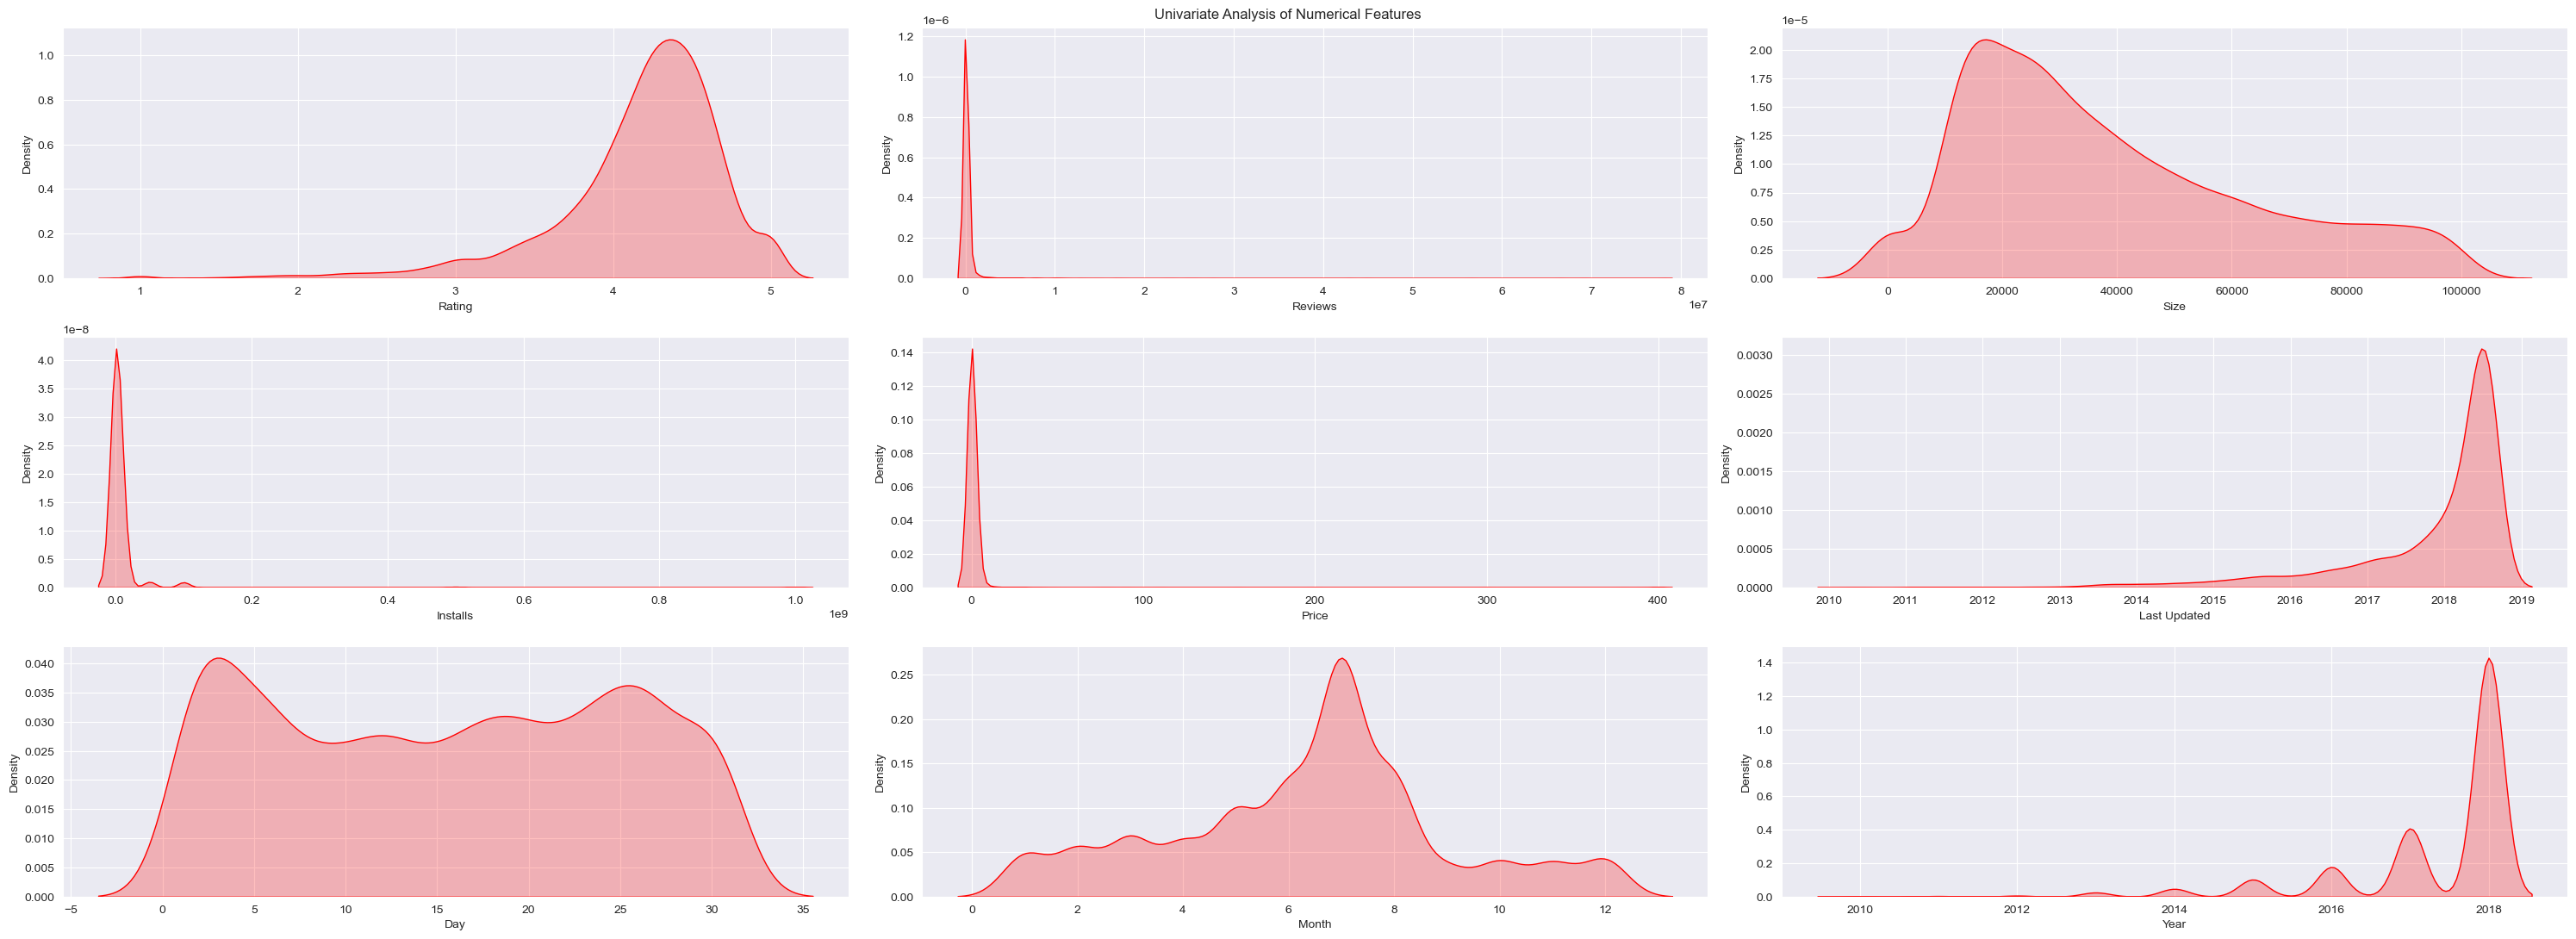

In [18]:
# Calculate and display the distribution of values for each numerical column
plt.figure(figsize=(30,18))  # Create a new figure with specified dimensions (width=15, height=15)
plt.suptitle('Univariate Analysis of Numerical Features')

for i in range(0, len(numeric_features)):  # Loop through each numerical feature by index
    plt.subplot(5, 3, i+1)  # Create a 5x3 grid of subplots and select the next position
    sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color='r')  # Plot a Kernel Density Estimate (KDE) for the current numerical feature
    plt.xlabel(numeric_features[i])  # Label the x-axis with the feature name
    plt.tight_layout()  # Adjust subplot spacing to prevent overlap between plots and labels

# Observations:
# - Right skewed: Reviews, Size, Installs, Price
# - Left skewed: Rating, Last Updated, Year

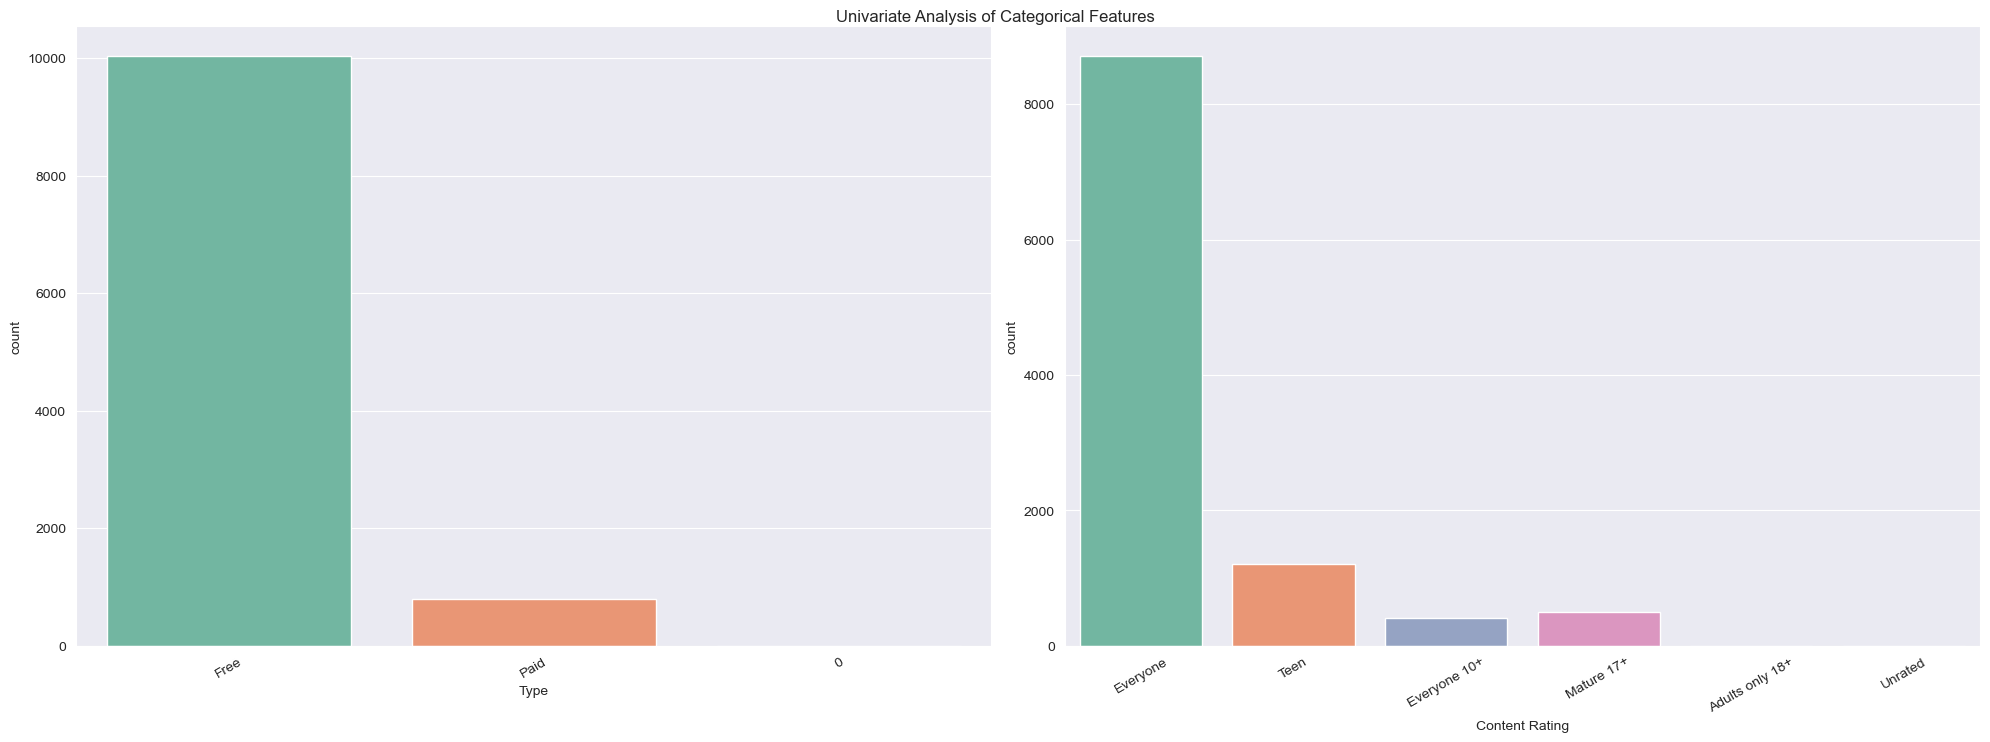

In [19]:
# Visualizing the distribution of categorical features using count plots
plt.figure(figsize=(20, 14))  # Create a new figure with a defined size
plt.suptitle('Univariate Analysis of Categorical Features')

category = ['Type', 'Content Rating']   # Categorical features chosen for plotting (others have too many unique values)

for i in range(0, len(category)):  # Loop through each categorical feature
    plt.subplot(2, 2, i+1)  # Create a 2x2 grid of subplots and select the next available slot
    sns.countplot(x=df[category[i]], palette="Set2")  # Plot a count plot showing the frequency of each category
    plt.xlabel(category[i])  # Label the x-axis with the feature name
    plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping between subplots

<Axes: ylabel='count'>

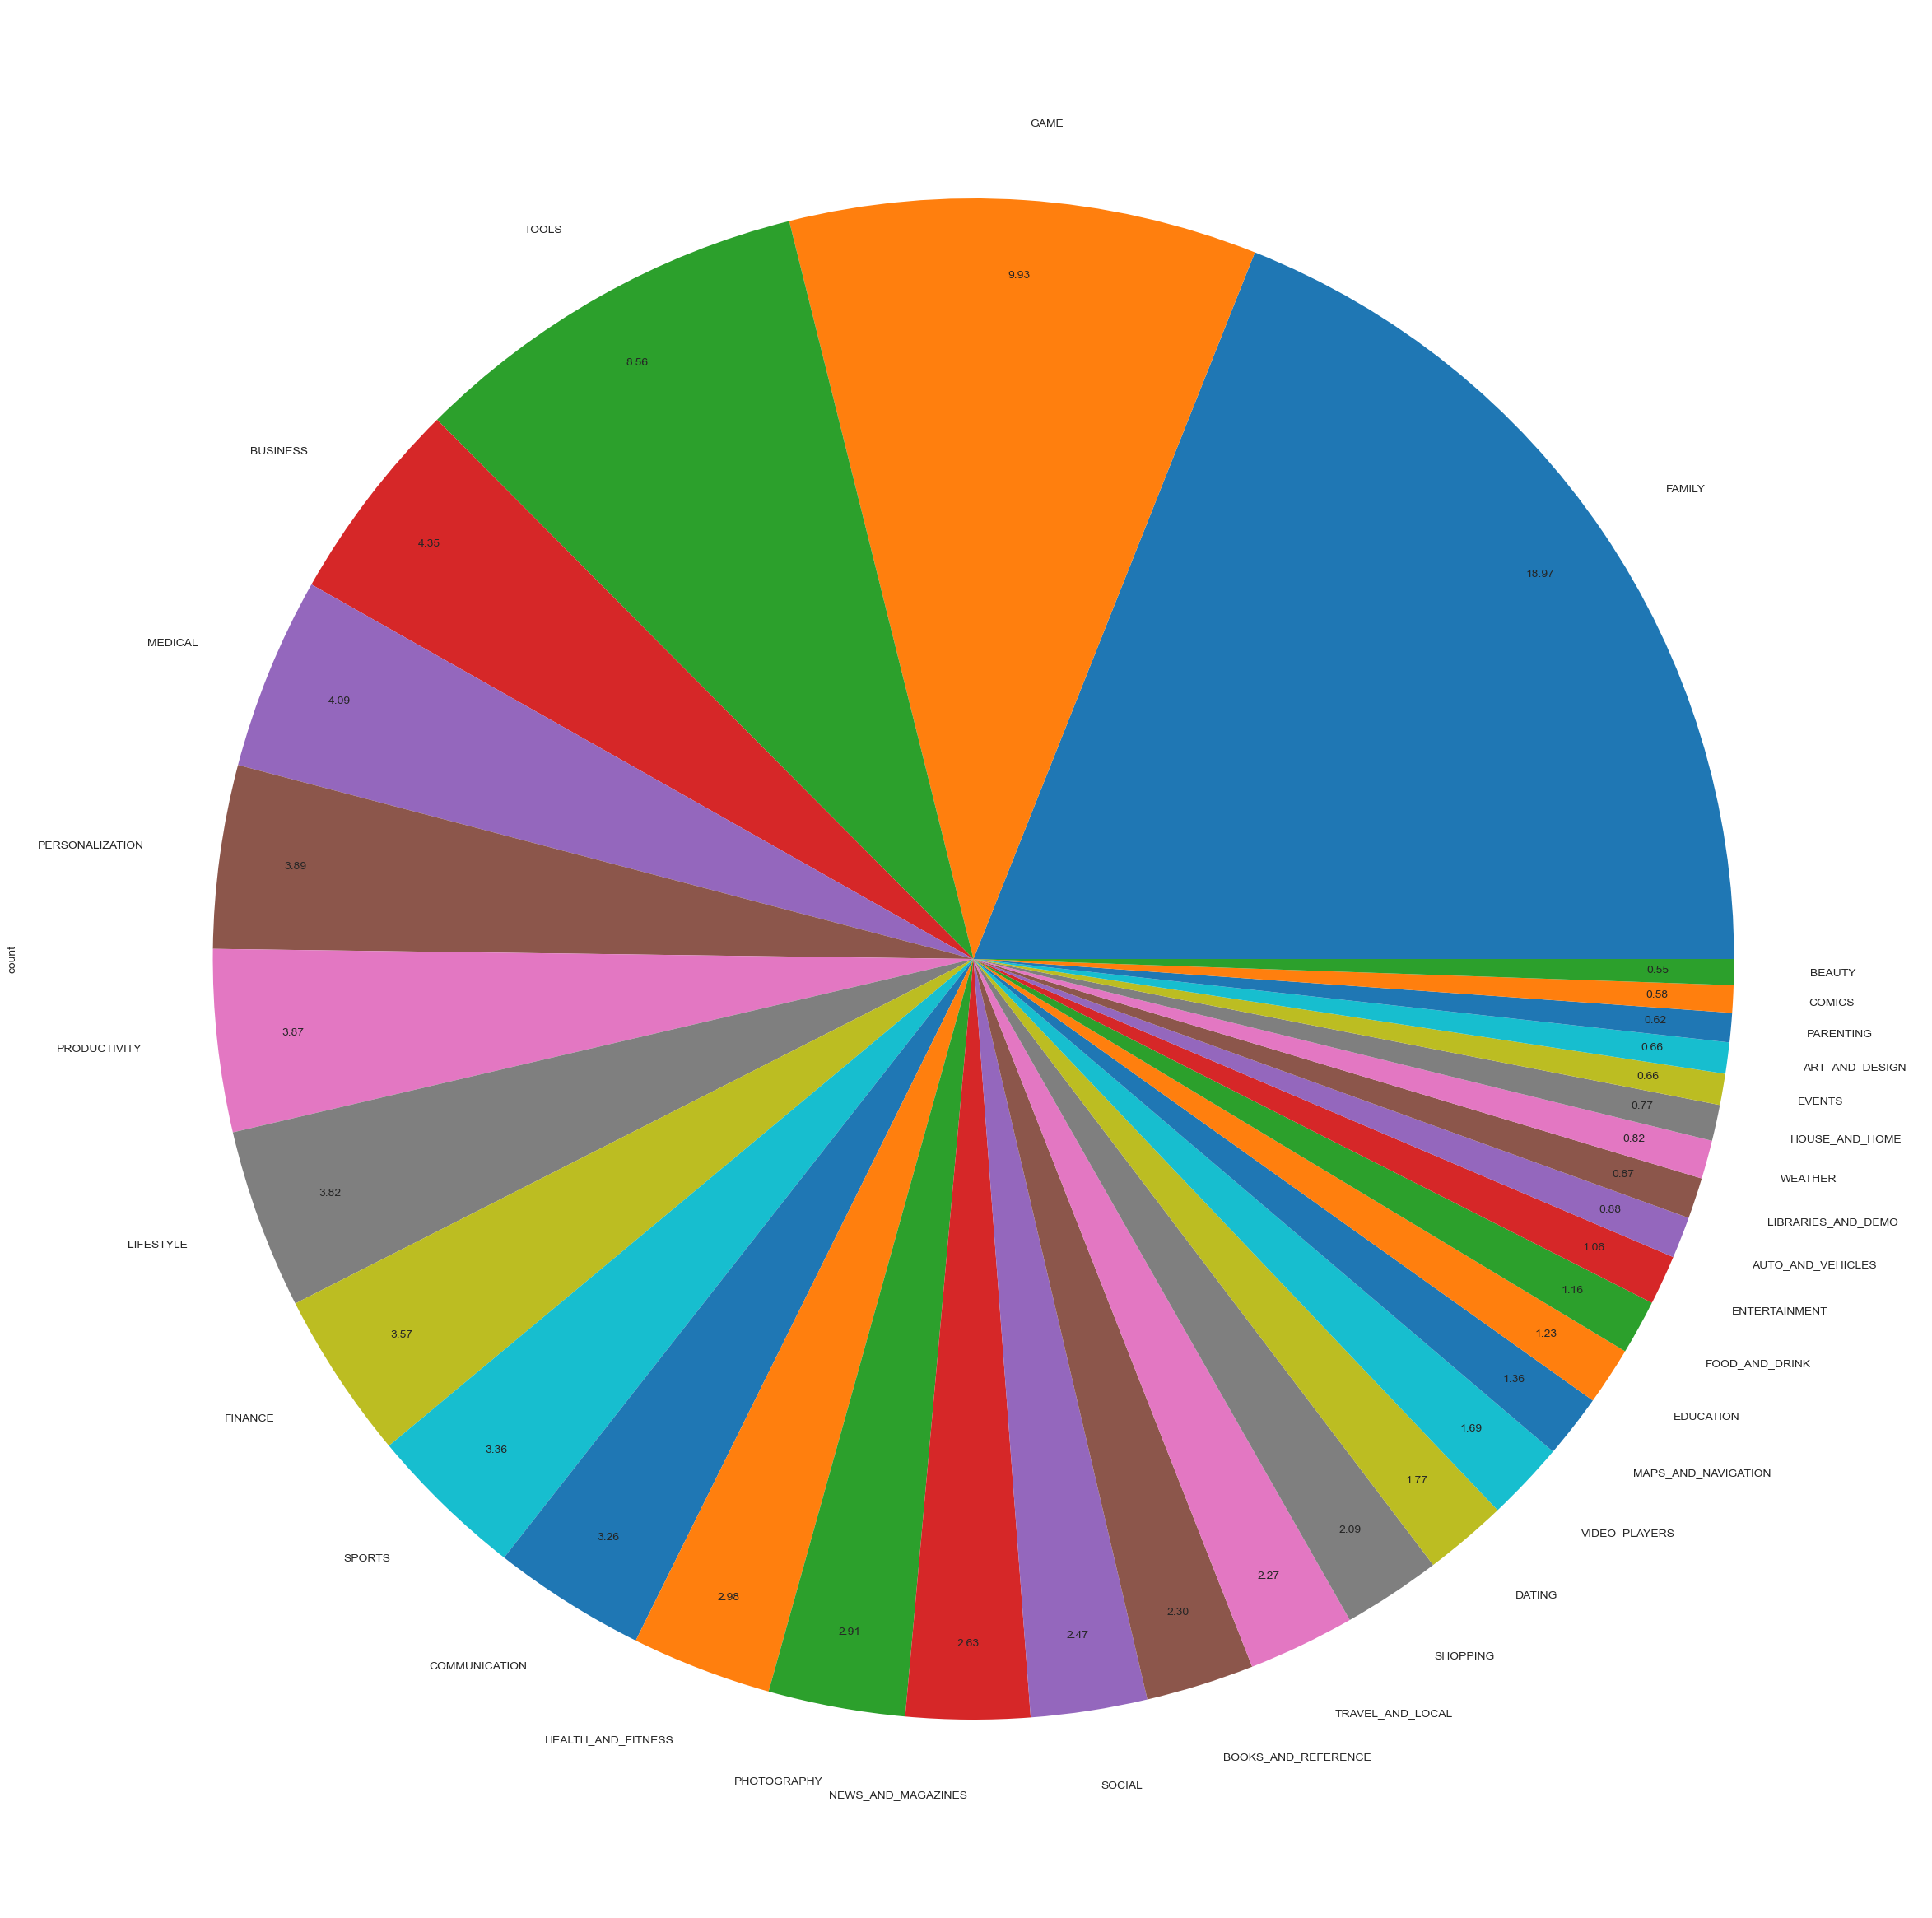

In [20]:
df_copy['Category'].value_counts().plot.pie(
    y=df_copy['Category'],
    figsize=(30,30),
    autopct='%1.2f',
    wedgeprops={'edgecolor': 'none'},
    pctdistance=0.9)

# Observations:
# - Most popular categories: Family, Game, Tools, Business
# - Least popular categories: Beauty, Comics, Parenting, Art & Design

In [21]:
# TOP 10 APP CATEGORIES
category = pd.DataFrame(df_copy['Category'].value_counts().reset_index())  # Generate a DataFrame with app counts for each category
category.columns = ['Category', 'Count']
category.head()

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


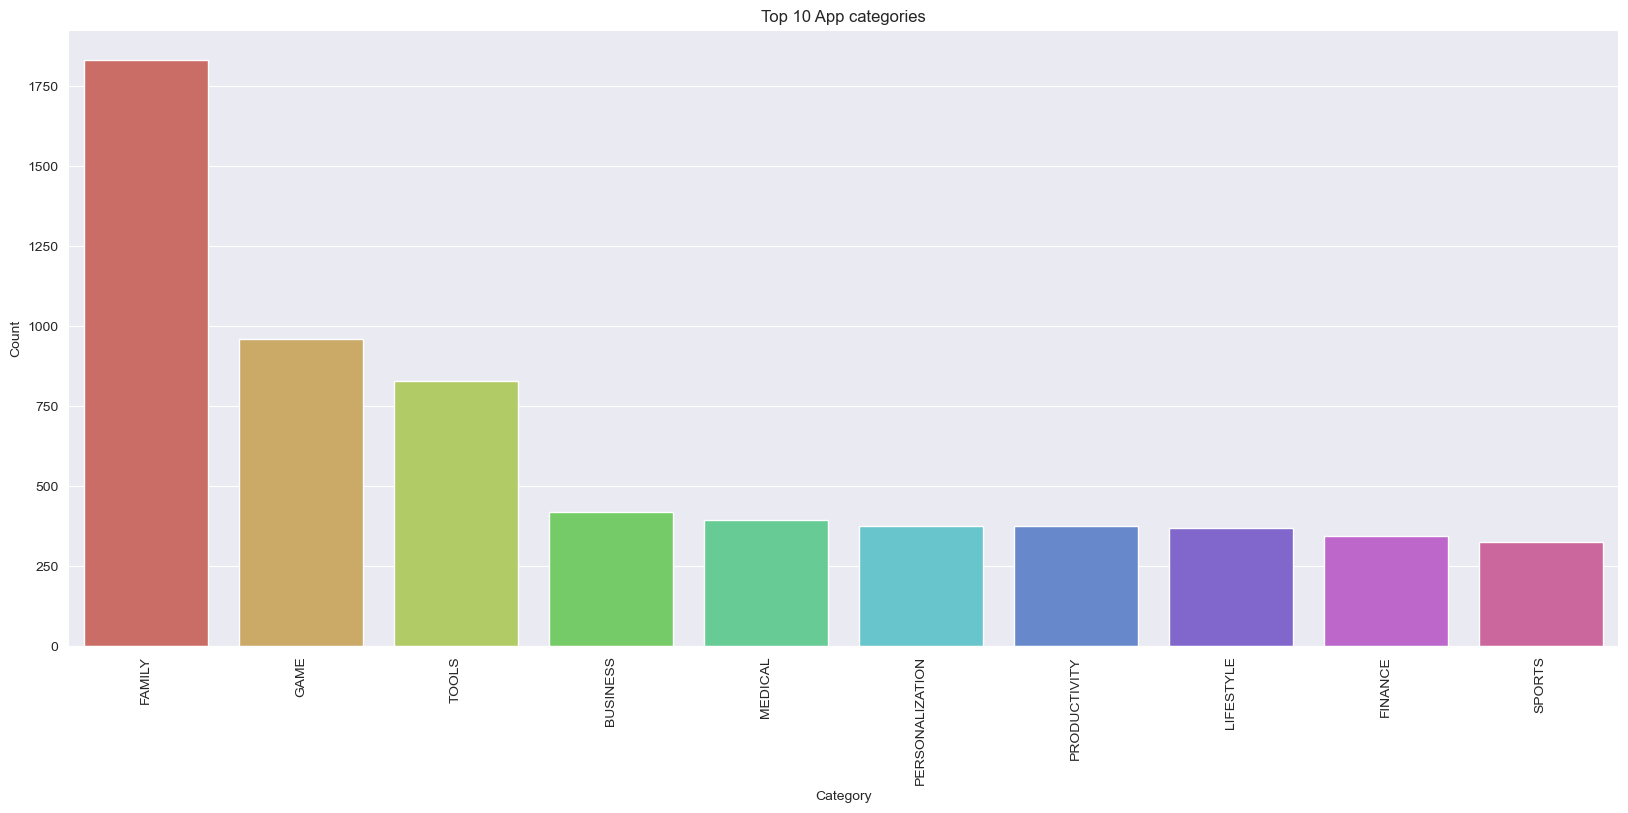

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x=category['Category'][:10], y ='Count', data = category[:10], palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

# Observations:
# - The Family category has the highest number of apps, representing 18% of all apps, followed by the Games category with 11%.
# - The Beauty category has the fewest apps, accounting for less than 1% of the total.

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

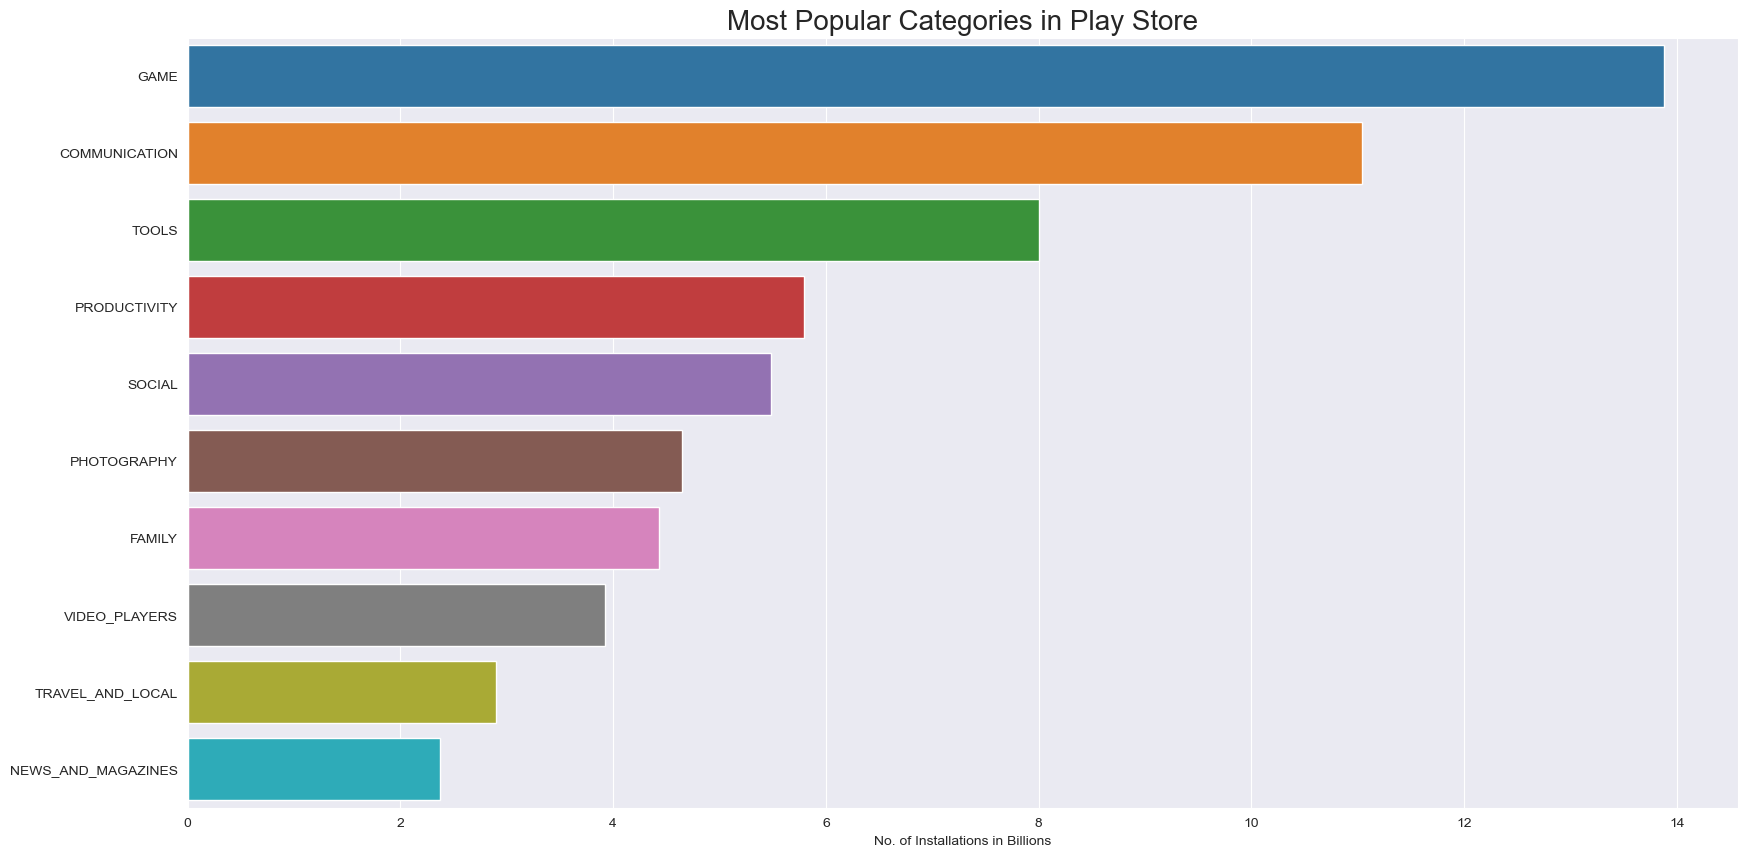

In [23]:
# CATEGORIES WITH THE MOST INSTALLATIONS

# Aggregate total installations per category and sort in descending order
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs['Installs'] = df_cat_installs['Installs'] / 1_000_000_000  # Convert installations into billions for easier readability
df2 = df_cat_installs.head(10)  # Select the top 10 categories by installations

plt.figure(figsize=(20,10))  # Set the figure size
ax = sns.barplot(x='Installs', y='Category', data=df2, palette='tab10')  # Create a horizontal barplot with Seaborn's 'tab10' palette
ax.set_xlabel('No. of Installations in Billions')  # Label the x-axis
ax.set_ylabel('')  # Remove the y-axis label
ax.set_title("Most Popular Categories in Play Store", size=20)  # Add a title to the plot

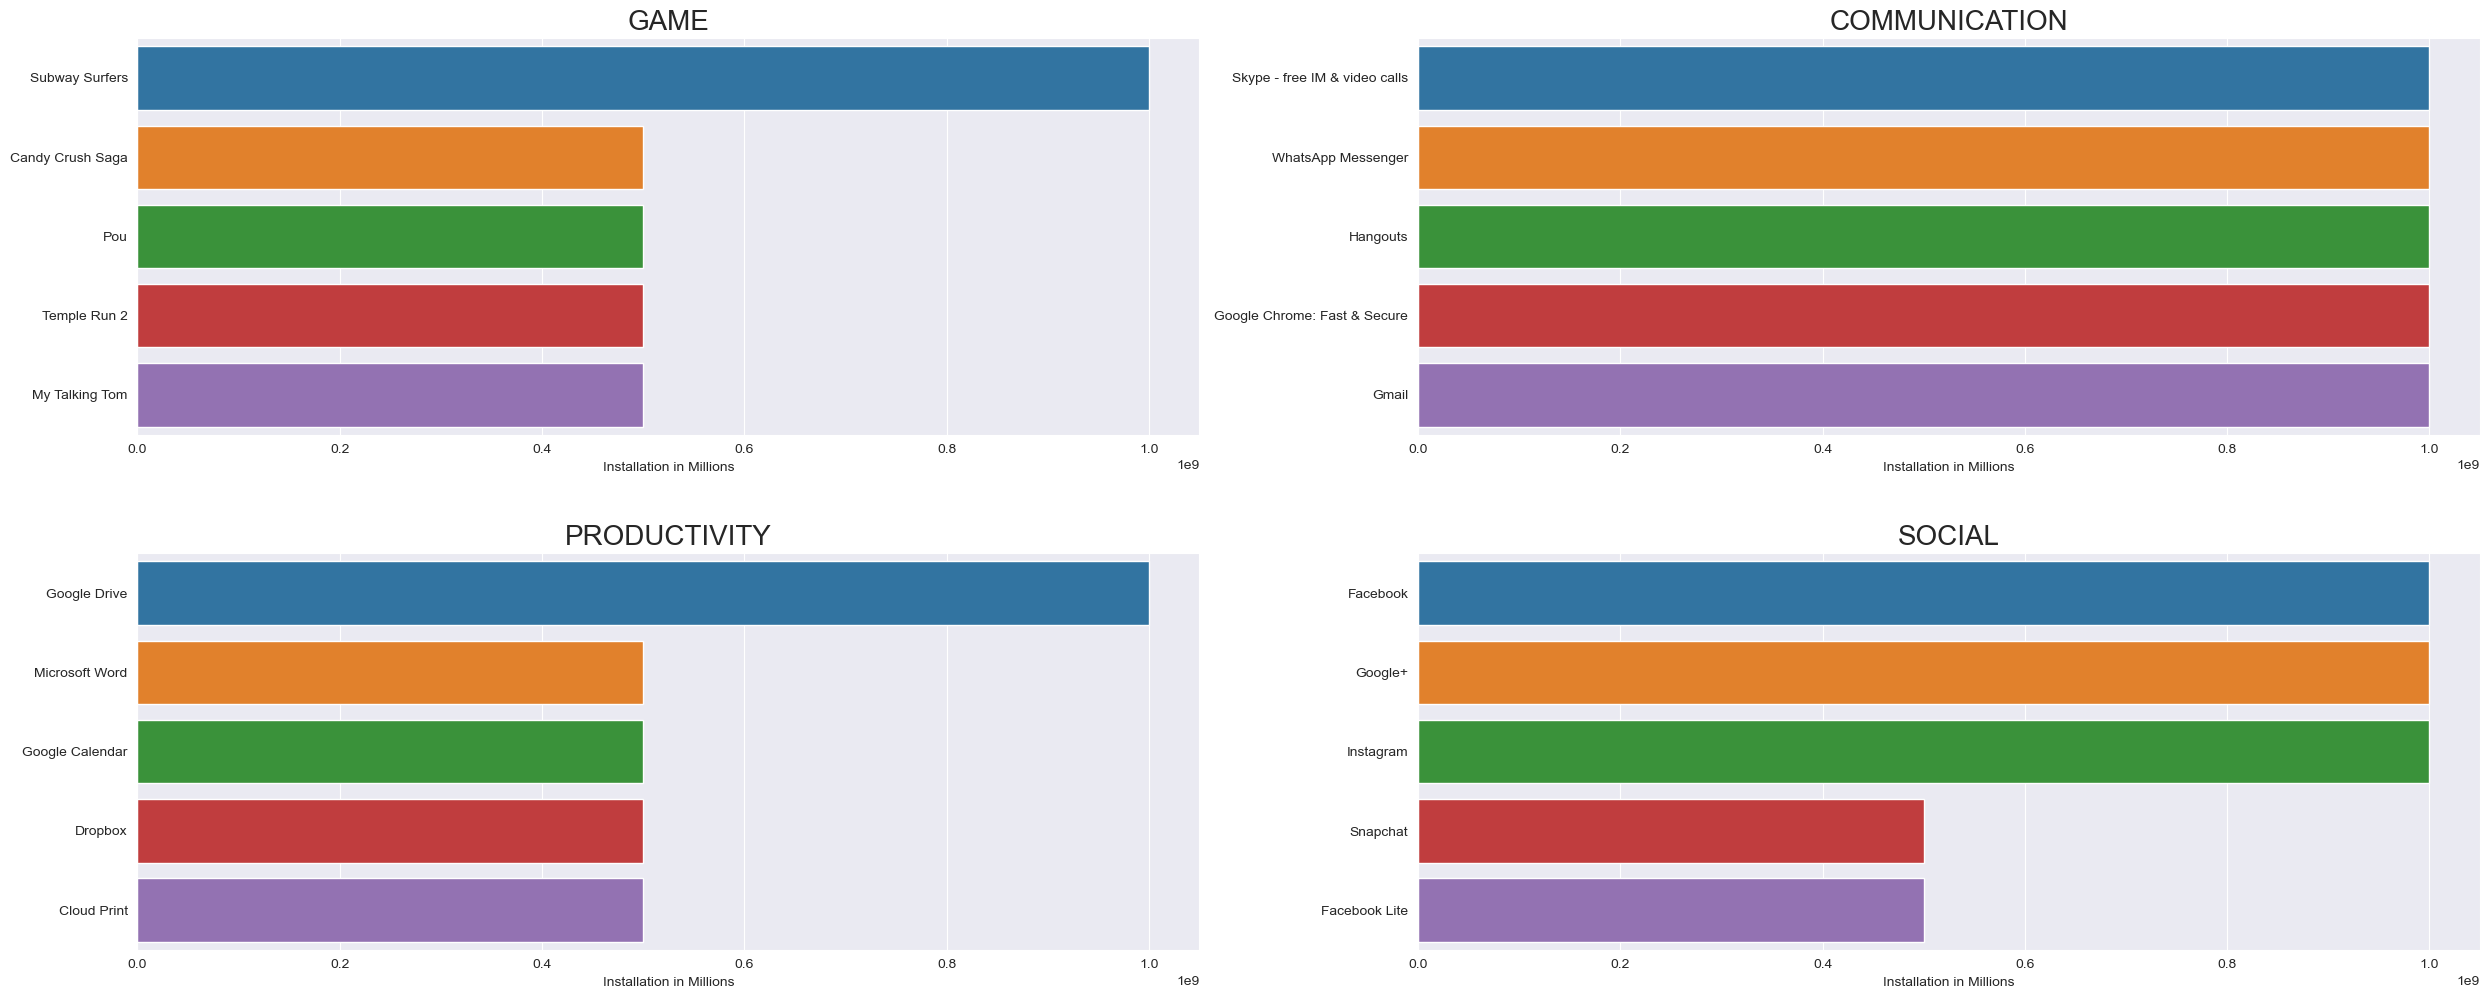

In [24]:
# MOST POPULAR APPS IN THE MOST POPULAR CATEGORIES

dfa = df_copy.groupby(['Category', 'App'])['Installs'].sum().reset_index()  # Aggregate total installations per app within each category
dfa = dfa.sort_values('Installs', ascending=False)  # Sort apps by total installations in descending order
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']  # List of categories to visualize

plt.figure(figsize=(25,20))  # Set the figure size for multiple subplots

for i, app in enumerate(apps):
    df2 = dfa[dfa.Category == app]  # Filter apps belonging to the current category
    df3 = df2.head(5)  # Select the top 5 apps by installations in the category
    plt.subplot(4, 2, i+1)  # Create a subplot for the current category (4 rows, 2 columns)
    sns.barplot(data=df3, x='Installs', y='App', palette='tab10')  # Plot a horizontal barplot of installations for the top apps
    plt.xlabel('Installation in Millions')  # Set x-axis label
    plt.ylabel('')  # Remove y-axis label
    plt.title(app, size=20)  # Add category title to subplot

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.subplots_adjust(hspace=0.3)  # Add vertical spacing between subplots
plt.show()  # Display all the subplots

# Observations:
# - The most popular game is Subway Surfers.
# - The most popular communication app is Hangouts.
# - The most popular productivity app is Google Drive.
# - The most popular social app is Instagram.

In [25]:
# HOW MANY APPS HAVE A RATING OF 5/5?

# Group by Category, App, and Installs, keep the Rating sum (if necessary), then sort by Installations descending
rating = df_copy.groupby(['Category', 'Installs', 'App'])['Rating'].sum().reset_index()  # Aggregate ratings per app
rating = rating.sort_values('Installs', ascending=False)  # Sort from most installations to least
top_rating_apps = rating[rating.Rating == 5.0]      # Filter apps with rating 5
print(f"Total apps rated 5/5: {top_rating_apps.shape[0]}")
top_rating_apps.head()

# Observations:
    # There are 271 five rated apps in the dataset
    # The best rated and most installed app is Ek Bander Ne Kholi Dukan

Total apps rated 5/5: 271


,Category,Installs,App,Rating
2390,FAMILY,10000,Ek Bander Ne Kholi Dukan,5.0
8608,TOOLS,5000,CL Keyboard - Myanmar Keyboard (No Ads),5.0
5525,LIFESTYLE,5000,Oración CX,5.0
850,COMICS,5000,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
2103,FAMILY,1000,Florida Wildflowers,5.0
